### Multi Layer Perceptron - forward and backward pass

In [1]:
import pickle
import gzip
import math
import torch
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from torch import tensor

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['figure.figsize'] = [4.0, 3.0]
plt.rcParams['font.size'] = 8

In [4]:
torch.manual_seed(11)
torch.set_printoptions(precision=3, linewidth=140, sci_mode=False)
np.set_printoptions(precision=3, linewidth=140)

In [5]:
path_data = Path('data')
path_gz = path_data/'mnist.pkl.gz'
with gzip.open(path_gz, 'rb') as f: 
    ((x_train, y_train),(x_valid, y_valid),_) = pickle.load(f, encoding='latin-1')

In [6]:
x_train, y_train, x_valid, y_valid = map(tensor,[x_train, y_train, x_valid, y_valid])

#### Let's build a small forward model

In [7]:
u = [5,3,7]
v = 8

tuple(zip([v]+u, u))

((8, 5), (5, 3), (3, 7))

- The init takes in the dim of the input `nx` and a list of the layer dims `nl`.
- All the layers are linear
- The parameters matrix for each hidden layer is initiated in `build_nn` from the layer dim list 
- The forward method passes each input through the succesion of linear layer - `relu` non-linearity

In [8]:
class MLP:
    def __init__(self, nx, nl):
        self.nx = nx
        self.nl = nl
        self.build_nn()
    
    def build_nn(self):
        self.W = []
        self.B = []
        for j,k in zip([self.nx] + self.nl, self.nl):
            self.W.append(torch.randn(j,k))
            self.B.append(torch.randn(k))
    
    def relu(self, x): return x.clamp_min(0.)
    
    def backwards(self):
        pass
        
    def forward(self, x): 
        for w, b in zip(self.W, self.B):
            x = self.relu(x@w + b)
        return x

In [9]:
x_train[:5].shape

torch.Size([5, 784])

We can use `1` instead of `10` as the last layer size to simplify our first implementation and use MSE instead of Cross-Entropy. The output number will be the actual category number $\in$ $\left\{0,1,2,3,4,5,6,7,8,9\right\}$. 

In [10]:
nl = [256, 64, 1]

In [11]:
model = MLP(x_train.shape[1], nl)

In [12]:
res = model.forward(x_valid)
res.shape, res[:5]

(torch.Size([10000, 1]),
 tensor([[348.696],
         [  0.000],
         [  0.000],
         [  0.000],
         [  0.000]]))

#### Let's use MSE as a quick illustration

We'll just implement the process and switch to cross entropy.

In [13]:
res.shape, y_valid.shape

(torch.Size([10000, 1]), torch.Size([10000]))

In [14]:
(res.squeeze() - y_valid).shape

torch.Size([10000])

In [15]:
def mse(y, yh): return (y.squeeze()-yh).pow(2).mean()

In [16]:
mse(res,y_valid)

tensor(5965.282)

We now want to implement the backward propagation of the gradient error. The derivative of the loss function with respect to the weights is :
$$ \frac{\partial \mathcal{L}}{\partial \mathcal{w_{i}}} = \frac{\partial \mathcal{L}}{\partial \mathcal{w_n}} \frac{\partial \mathcal{w_n}}{\partial \mathcal{w_{n-1}}} \dots \frac{\partial \mathcal{w_{i-1}}}{\partial \mathcal{w_{i}}}$$

The derivative of MSE $(y-y_h)^2$

#### Entropy

In [27]:
0.8*math.log(0.8)

-0.17851484105136778

In [40]:
-0.25*math.log(0.25)*4

1.3862943611198906

In [48]:
-0.001*math.log(0.001) -0.001*math.log(0.001) -0.001*math.log(0.001) - 0.997*math.log(0.997)

0.02172276567019636

In [46]:
- math.log(0.001) - math.log(0.001) - math.log(0.001) - math.log(0.997)

20.72627034596671

In [49]:
-math.log(0.25)*4

5.545177444479562

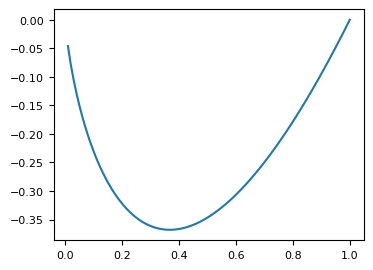

In [53]:
x = np.linspace(0.01,1,100)
# plt.plot(x, np.log(x**x))
plt.plot(x, x*np.log(x))